In [1]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
from prepare_X import get_featrues, specs

In [5]:
df_features = get_featrues(specs)
df_features.index = df_features.index.date

transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 97367270 has generated.
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 68488648 has generated.
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 56494646 has generated.
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 62918036 has generated.
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 09904850 has generated.
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 41716908 has generated.
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 22224505 has generated.
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 65400347 has generated.
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 79649739 has generated.
transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
feature: 96290600 has generated.


In [6]:
df_features.head()

,97367270,68488648,56494646,62918036,09904850,41716908,22224505,65400347,79649739,96290600,...,55471756,88127301,00957305,46067661,37865502,48032436,27939058,23569330,22166205,49320730
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8978.0,...,NaN,NaN,NaN,8974.00,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8838.0,...,NaN,NaN,NaN,9030.00,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8869.0,...,NaN,NaN,NaN,9030.00,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,8891.6,9084.566733,8698.633267,-1.558775,NaN,NaN,NaN,NaN,NaN,8753.0,...,NaN,NaN,NaN,9025.22,8891.6,NaN,NaN,NaN,NaN,NaN


In [7]:
df_features.shape

(2000, 74)

In [11]:
from turnpt_analysis import get_df_turnpt_measures

In [13]:
N = 1
df_y = get_df_turnpt_measures(N)
df_y.index = df_y.tx_datetime

In [14]:
df_chosen_y = df_y[['is_turnpt_upward']]

In [15]:
# df_y.columns

In [16]:
df_chosen_y.head()

,is_turnpt_upward
tx_datetime,
2011-01-03,NaN
2011-01-04,NaN
2011-01-05,1.0
2011-01-06,0.0
2011-01-07,1.0


In [17]:
assert type(df_chosen_y.index.values[0]) == type(df_features.index.values[0])

# data

In [18]:
df = df_chosen_y.join(df_features).dropna()

In [19]:
df.head()

,is_turnpt_upward,97367270,68488648,56494646,62918036,09904850,41716908,22224505,65400347,79649739,...,55471756,88127301,00957305,46067661,37865502,48032436,27939058,23569330,22166205,49320730
tx_datetime,,,,,,,,,,,,,,,,,,,,,
2011-04-07,0.0,8730.6,8965.259242,8495.940758,1.905940,3.091469,4.287791,4.262126,3.821936,3.770431,...,90.301856,65.817269,56.267296,8199.986974,8730.6,8630.2,8531.200000,8533.30,8569.48,8573.733333
2011-04-12,1.0,8833.0,8966.476590,8699.523410,-1.449111,-0.146826,0.801315,1.720663,1.428978,1.231524,...,44.305565,52.645037,49.989518,8420.994761,8833.0,8717.8,8635.800000,8557.75,8582.36,8599.100000
2011-04-13,0.0,8826.6,8961.564292,8691.635708,-0.233385,0.681423,1.644441,2.717236,2.566133,2.330302,...,58.999233,57.577332,52.909667,8483.155390,8826.6,8746.4,8663.533333,8573.05,8585.68,8605.466667
2011-04-15,1.0,8774.6,8896.364363,8652.835637,-0.804595,-0.867862,-0.025269,0.962765,1.375275,1.062800,...,41.825739,51.344422,49.736027,8585.993934,8774.6,8780.2,8706.200000,8621.00,8585.92,8612.466667
2011-04-18,0.0,8744.8,8839.215253,8650.384747,-0.397951,-0.876295,-0.096348,0.766450,1.403584,1.147343,...,43.061352,51.677433,49.920595,8628.354662,8744.8,8787.0,8718.400000,8643.75,8589.44,8611.200000


In [20]:
df.shape

(903, 75)

# https://github.com/catboost/tutorials

In [21]:
import numpy as np
from catboost import CatBoostClassifier, Pool

In [22]:
from catboost import CatBoostRegressor

In [23]:
num_train = int(df.shape[0] * 0.75)

In [24]:
y = df.is_turnpt_upward 
y_train = y[: num_train]
y_test = y[num_train:]

In [25]:
X = df.iloc[:, 1:]
X_train = X.iloc[:num_train, :]
X_test = X.iloc[num_train:, :]

In [26]:
train_pool = Pool(X_train, y_train, weight=y_train.abs()+1)
test_pool = Pool(X_test, y_test, weight=y_test.abs()+1)

In [27]:
# model = CatBoostRegressor(iterations=10**5, # set very large number and set early stops
#                           depth=10, #fine-tune
#                           learning_rate=0.01, #max: 0.5
#                           loss_function='RMSE', 
#                           l2_leaf_reg = 202, #fine-tune
#                           od_type = 'Iter',
#                           od_wait = 250
#                          )

In [28]:
model = CatBoostClassifier(iterations=10**5, # set very large number and set early stops
                          depth=10, #fine-tune
                          learning_rate=0.5, #max: 0.5
#                           loss_function='RMSE', 
                          l2_leaf_reg = 202, #fine-tune
                          od_type = 'Iter',
                          od_wait = 250
                         )

In [29]:
model.fit(train_pool, eval_set=test_pool)

0:	learn: 0.6541524	test: 0.6457241	best: 0.6457241 (0)	total: 80.8ms	remaining: 2h 14m 41s
1:	learn: 0.6165338	test: 0.6107926	best: 0.6107926 (1)	total: 111ms	remaining: 1h 32m 41s
2:	learn: 0.5894743	test: 0.5839266	best: 0.5839266 (2)	total: 141ms	remaining: 1h 18m 4s
3:	learn: 0.5780462	test: 0.5802450	best: 0.5802450 (3)	total: 171ms	remaining: 1h 11m 7s
4:	learn: 0.5637358	test: 0.5693703	best: 0.5693703 (4)	total: 201ms	remaining: 1h 6m 53s
5:	learn: 0.5539948	test: 0.5659680	best: 0.5659680 (5)	total: 230ms	remaining: 1h 3m 59s
6:	learn: 0.5442254	test: 0.5652094	best: 0.5652094 (6)	total: 264ms	remaining: 1h 2m 46s
7:	learn: 0.5348487	test: 0.5579826	best: 0.5579826 (7)	total: 295ms	remaining: 1h 1m 29s
8:	learn: 0.5270070	test: 0.5476789	best: 0.5476789 (8)	total: 328ms	remaining: 1h 39s
9:	learn: 0.5189741	test: 0.5422549	best: 0.5422549 (9)	total: 361ms	remaining: 1h 9s
10:	learn: 0.5131450	test: 0.5410567	best: 0.5410567 (10)	total: 391ms	remaining: 59m 17s
11:	learn: 0.5

In [30]:
# model.plot_tree(0)

In [33]:
m = model.eval_metrics(test_pool, ['Precision', 'Recall'])
m['Precision'][0], m['Recall'][0], 'The precision and recall are too good to be true. Check if using data from future'

(0.8064516129032258,
 0.8928571428571429,
 'The precision and recall are too good to be true. Check if using data from future')

In [34]:
import pandas as pd

In [35]:
df_pred = pd.DataFrame({'pred': model.predict(test_pool), 'y': y_test})
df_pred.head()

,pred,y
tx_datetime,,
2017-03-23,1.0,0.0
2017-03-27,1.0,1.0
2017-03-28,0.0,0.0
2017-03-31,1.0,1.0
2017-04-05,0.0,0.0


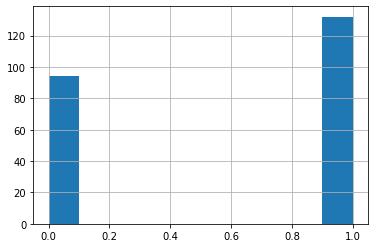

In [36]:
df_pred.pred.hist()

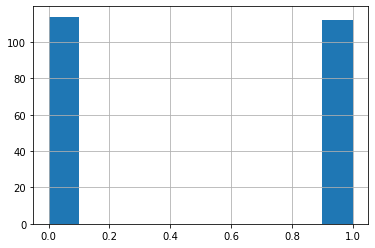

In [37]:
df_pred.y.hist()